# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aguerrero023/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = '285d50a9f0924f64a1f381777d220ba8')

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q = "bitcoin", language = "en", sort_by = "relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "ethereum", language = "en", sort_by = "relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for x in btc_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append(
            {
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        }
        )

    except AttributeError:
        pass
btc_sentiment = pd.DataFrame(btc_sentiments)
btc_sentiment.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score
0,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []
for x in eth_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        })
        
    except AttributeError:
        pass
eth_sentiment = pd.DataFrame(eth_sentiments)
eth_sentiment.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.0,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.0,0.892
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.0,0.899


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,Compound Score,Positive Score,Negative Score,Neutral Score
count,20.000000,20.000000,20.000000,20.000000
mean,0.174515,0.063650,0.017250,0.919150
std,0.301388,0.069401,0.034421,0.069565
min,-0.440400,0.000000,0.000000,0.781000
25%,0.000000,0.000000,0.000000,0.875750
50%,0.107950,0.049000,0.000000,0.916500
75%,0.378475,0.104000,0.008500,1.000000
max,0.726900,0.219000,0.116000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,Compound Score,Positive Score,Negative Score,Neutral Score
count,20.000000,20.000000,20.000000,20.000000
mean,0.242790,0.062500,0.002400,0.935100
std,0.332890,0.093796,0.010733,0.096616
min,0.000000,0.000000,0.000000,0.692000
25%,0.000000,0.000000,0.000000,0.897250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.463275,0.102750,0.000000,1.000000
max,0.941300,0.308000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC with 0.063650

Q: Which coin had the highest compound score?

A: ETH with 0.941300

Q. Which coin had the highest positive score?

A: ETH with 0.308000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aguerrero023/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aguerrero023/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))
print(sw)

{'or', 'here', 'has', "hadn't", 'before', "don't", 's', 'is', 'other', 'than', 'we', 'up', 'ours', 'll', 'of', 'during', 'ain', 'mightn', 'it', 'an', 'but', "it's", "wasn't", 'more', "that'll", 'i', 'at', 'as', 'don', 'in', 'were', 'this', 'does', 'ourselves', 'm', 'doesn', 'too', 'shouldn', 'against', "you've", 'out', 'so', 'ma', 'which', 'me', 'if', 'all', 'then', 'no', 'between', 'again', 'was', 'own', 'our', 'be', 'nor', 'needn', "haven't", 'until', 'when', 'your', 'what', 'whom', 'under', 'why', 'most', 'herself', "isn't", 'from', 'aren', 'on', "weren't", 'into', 'couldn', "didn't", "you'll", 'hasn', 'itself', 'hadn', 'he', 'not', 'below', 'are', 're', 'the', 'its', 'after', 'that', "aren't", 'a', 'had', 'him', 'any', 'myself', 'above', 'how', 'each', 'where', 'won', 't', 'you', 'shan', 'himself', 'mustn', 'theirs', 'once', 'weren', "mustn't", 'yourselves', 'by', 'themselves', "won't", 'who', 'about', 'wasn', 'd', 'to', 'these', 'over', 'wouldn', 'did', "you'd", 'them', 'they', 'w

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ',text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(x) for x in words]
    tokens = [x.lower() for x in lem if x.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment["Tokens"] = [tokenizer(x) for x in btc_sentiment["Text"]]
bit_col = ["Date","Text","Tokens","Compound Score","Positive Score","Negative Score", "Neutral Score"]
btc_sentiment = btc_sentiment[bit_col]
btc_sentiment.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2021-09-23,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, app,...",0.0000,0.000,0.000,1.000
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,"[bitcoin, similar, blockchain, based, cryptos,...",0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...","[ul, li, bitcoin, term, market, value, rose, l...",0.3400,0.076,0.000,0.924
3,2021-10-06,How high are the chances of Bitcoin sustaining...,"[high, chance, bitcoin, sustaining, gain, push...",0.4939,0.219,0.000,0.781
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ...",-0.2411,0.000,0.116,0.884


In [14]:
# Create a new tokens column for Ethereum
eth_sentiment["Tokens"] = [tokenizer(x) for x in eth_sentiment["Text"]]
eth_col = ["Date","Text","Tokens","Compound Score","Positive Score","Negative Score", "Neutral Score"]
eth_sentiment = eth_sentiment[eth_col]
eth_sentiment.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2021-10-16,A new cross-chain bridge is currently connecte...,"[new, cross, chain, bridge, currently, connect...",0.0000,0.000,0.0,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,"[country, latest, crackdown, digital, currency...",0.0000,0.000,0.0,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,"[mark, cuban, ha, advice, people, new, investi...",0.0000,0.000,0.0,1.000
3,2021-09-22,Robinhood plans to start a cryptocurrency wall...,"[robinhood, plan, start, cryptocurrency, walle...",0.4588,0.108,0.0,0.892
4,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...","[image, source, foundation, app, sideeyeingchl...",0.4215,0.101,0.0,0.899


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = [Counter(ngrams(x, n = 2)) for x in btc_sentiment.Tokens]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = [Counter(ngrams(x, n = 2)) for x in eth_sentiment.Tokens]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    one = []
    two = []
    for x in tokens:
        one.append(x)
    for low in one:
        for item in low:
            two.append(item)
    return Counter(two).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_sentiment.Tokens)

[('char', 17),
 ('bitcoin', 16),
 ('li', 6),
 ('http', 6),
 ('ift', 6),
 ('tt', 6),
 ('u', 5),
 ('cryptocurrency', 5),
 ('reuters', 5),
 ('four', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_sentiment.Tokens)

[('char', 20),
 ('bitcoin', 12),
 ('reuters', 10),
 ('cryptocurrency', 9),
 ('ha', 9),
 ('ethereum', 8),
 ('illustration', 7),
 ('currency', 4),
 ('bank', 4),
 ('image', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

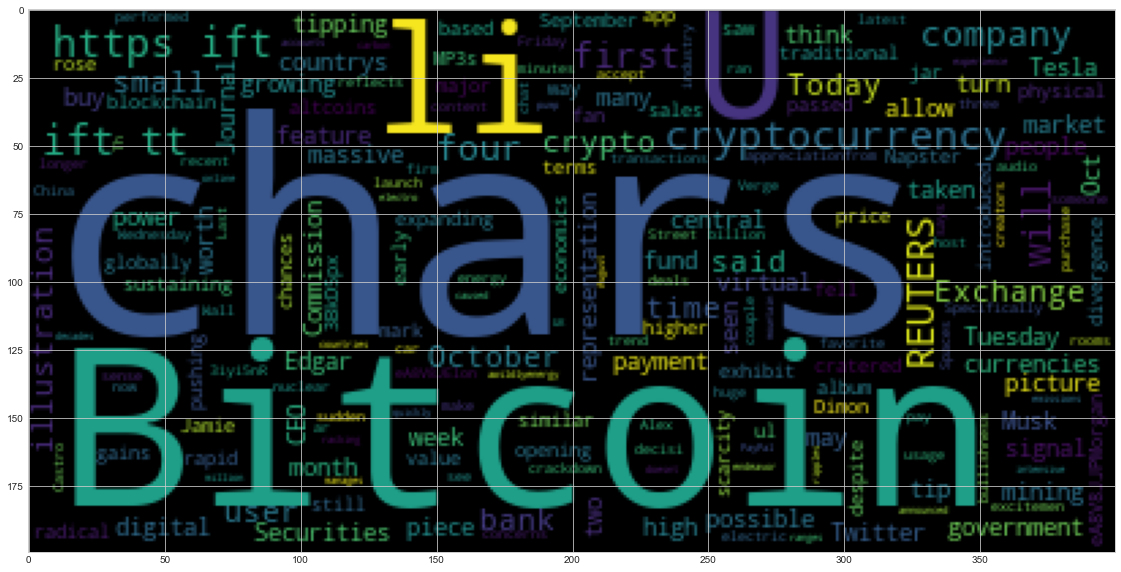

In [22]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_sentiment.Text.str.cat())
plt.imshow(btc_wc)

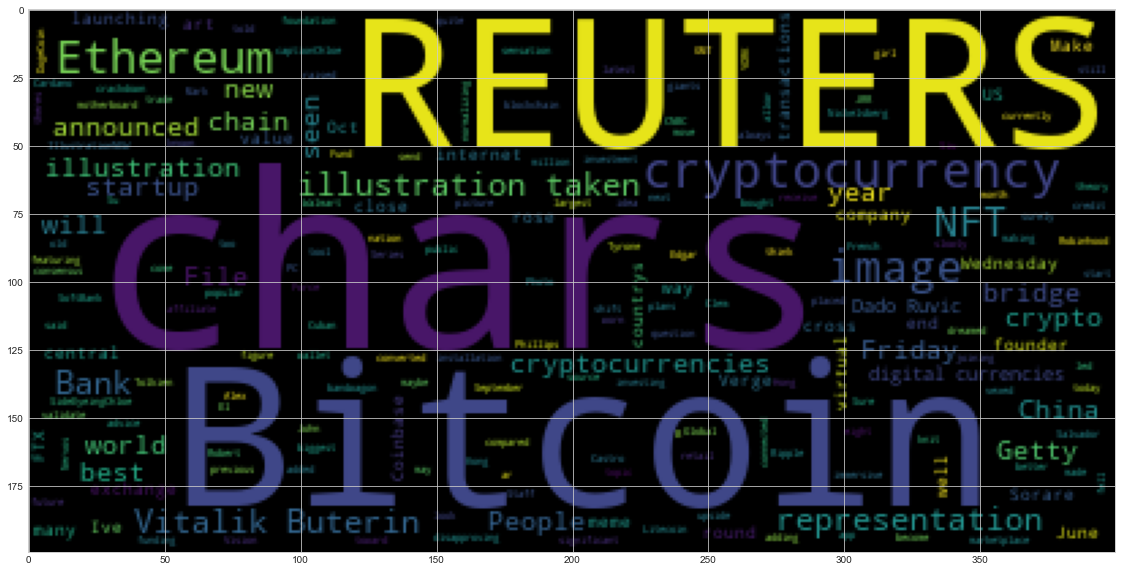

In [23]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_sentiment.Text.str.cat())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
def generator(text):
    great_string=''
    for x in text:
        cool_string=''.join(x)
        great_string=great_string + cool_string
    tokens=nlp(great_string)
    return tokens

In [28]:
# Run the NER processor on all of the text
btc_ner = generator(btc_sentiment["Text"])

# Add a title to the document
btc_ner.user_data["title"]="BTC NER"

In [29]:
# Render the visualization
displacy.render(btc_ner,style="ent")

In [30]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text,ent.label_)

Four months DATE
4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
Jamie Dimon PERSON
https://ift.tt/3iyi5nR EVENT
Musk PERSON
Tesla PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
Alex Castro PERSON
The Verge
 WORK_OF_ART
The Peoples Bank of China ORG
Friday DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Th ORG
electro GPE
two decades DATE
403 million CARDINAL
23 August DATE
UK GPE
four CARDINAL
SEC ORG
two CARDINAL
IMF ORG
Kristalina Georgieva PERSON
Elon Musk PERSON
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
16 CARDINAL
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE


---

### Ethereum NER

In [31]:
# Run the NER processor on all of the text
eth_ner = generator(eth_sentiment["Text"])
# Add a title to the document
eth_ner.user_data["title"]="ETH NER"

In [32]:
# Render the visualization
displacy.render(eth_ner,style="ent")

In [33]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text,ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Alex Castro PERSON
The Verge
 WORK_OF_ART
The Peoples Bank of China ORG
Friday DATE
Cuban NORP
CNBC ORG
Wednesday DATE
next month DATE
Wednesday DATE
captionChloe Clem's PERSON
two-year-old DATE
French NORP
Sorare ORG
SoftBank ORG
Vision Fund 2 ORG
$680 million MONEY
4 MONEY
Vitalik Buterin PERSON
2013 DATE
Getty Images PERSON
John Phillips PERSON
Vitalik Buterin PERSON
eight CARDINAL
El Salvador GPE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PRODUCT
Reuters ORG
1 CARDINAL
Reuters ORG
9.46% PERCENT
47,980.97 MONEY
20:12 GMT TIME
Friday DATE
4,146.54 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PhotoOct 

---